In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='Malgun Gothic')

* x = 순서형 / y = 시간 데이터

In [2]:
df1 = pd.read_csv('./data/Data03.csv')
df1.head(2)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


In [3]:
df1['datetime(timestamp)'] = pd.to_datetime(df1['datetime'])

<AxesSubplot:xlabel='datetime(timestamp)', ylabel='amount'>

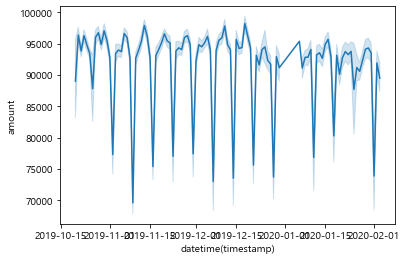

In [5]:
sns.lineplot(data=df1, x= 'datetime(timestamp)', y ='amount')

<AxesSubplot:xlabel='datetime(timestamp)', ylabel='amount'>

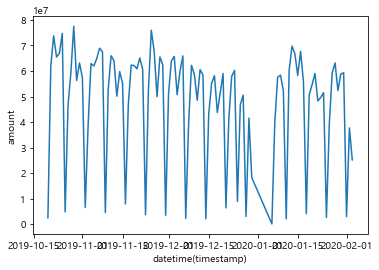

In [7]:
sns.lineplot(data=df1, x= 'datetime(timestamp)', y ='amount', ci=None, estimator = sum)

In [9]:
df1['계약요일'] = df1['datetime(timestamp)'].dt.day_name()

<AxesSubplot:xlabel='계약요일', ylabel='amount'>

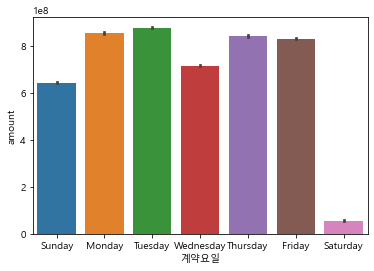

In [10]:
sns.barplot(data=df1, x = '계약요일', y= 'amount', estimator = sum)
# 토요일날 영업을 안한다는 것을 알 수 있다.

In [14]:
df1['계약주차'] = df1['datetime(timestamp)'].dt.week

<ipython-input-14-930d073324b9>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df1['계약주차'] = df1['datetime(timestamp)'].dt.week


<AxesSubplot:xlabel='계약주차', ylabel='amount'>

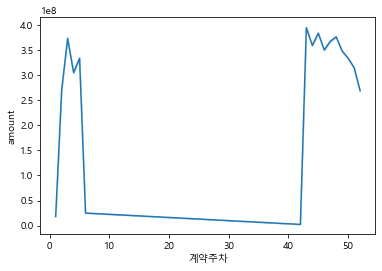

In [15]:
sns.lineplot(data=df1, x = '계약주차', y= 'amount', estimator = sum)

In [17]:
df1['계약연도'] = df1['datetime(timestamp)'].dt.year

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

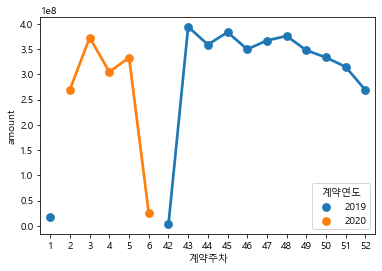

In [18]:
# 연도별 계약주차 시각화

sns.pointplot(data=df1, x = '계약주차', y= 'amount',ci=None, estimator = sum, hue='계약연도')

<AxesSubplot:xlabel='계약주차', ylabel='amount'>

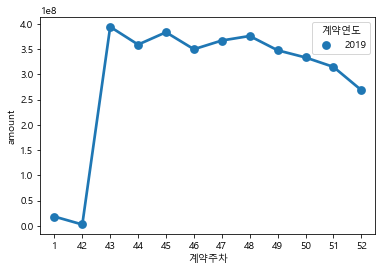

In [21]:
cond1 = (df1['계약연도'] == 2019)
df2 = df1.loc[cond1]
sns.pointplot(data=df2, x = '계약주차', y= 'amount',ci=None, estimator = sum, hue='계약연도')